In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../')


In [2]:
#https://ember-energy.org/data/electricity-data-explorer/
#https://www.deloitte.com/us/en/insights/industry/technology/technology-media-and-telecom-predictions/2025/genai-power-consumption-creates-need-for-more-sustainable-data-centers.html
energy_ai = {
    "Estimated Energy Usage of Data Centers in 2025" : 536.0,
    "Estimated Energy Usage of Data Centers in 2026" : 681.0,
    "Estimated Energy Usage of Data Centers in 2030" : 1065.0,
    "Estimated Energy Usage of NVIDIA GPU Servers in 2027": 85.4,
    "Estimated Energy Usage of AI Factories in 2026" : 90.0,
    "Energy Usage of Google's\nAI-Powered Search in 2023": 29.0,
},
energy_countries = pd.read_csv("../data/ember_yearly_electricity-demand.csv")
energy_countries


,entity,entity_code,is_aggregate_entity,date,demand_twh,demand_kwh_per_capita,demand_yoy_change_twh,demand_yoy_change_pct,demand_yoy_change_kwh_per_capita
0,Portugal,PRT,False,2020,52.85,5096.18,-2.15,-3.91,-207.32
1,Portugal,PRT,False,2021,53.97,5193.94,1.12,2.12,107.79
2,Portugal,PRT,False,2022,55.58,5335.47,1.61,2.98,154.55
3,Portugal,PRT,False,2023,56.42,5409.01,0.84,1.51,80.53
4,Portugal,PRT,False,2024,57.15,5481.86,0.73,1.29,70.02
...,...,...,...,...,...,...,...,...,...
79,New Zealand,NZL,False,2020,43.35,8550.47,-0.40,-0.91,-78.90
80,New Zealand,NZL,False,2021,43.55,8526.35,0.20,0.46,39.16
81,New Zealand,NZL,False,2022,43.78,8531.23,0.23,0.53,44.82
82,New Zealand,NZL,False,2023,43.86,8478.91,0.08,0.18,15.47


In [3]:
# bar plot for energy Usage by country
df = energy_countries[["entity", 'date',"demand_twh"]].copy()
df = df.rename(columns={"entity": "Country", "date": "Year", "demand_twh": "Energy Usage (TWh)"})
df["Year"] = pd.to_datetime(df["Year"], format='%Y').dt.year
df.replace({"Country": {
    "Papua New Guinea": "Papua\nNew Guinea",
    "Costa Rica": "Costa\nRica",
    "Dominican Republic": "Dominican\nRepublic",
    "New Zealand": "New\nZealand",
}}, inplace=True)
df.head()

,Country,Year,Energy Usage (TWh)
0,Portugal,2020,52.85
1,Portugal,2021,53.97
2,Portugal,2022,55.58
3,Portugal,2023,56.42
4,Portugal,2024,57.15


In [4]:
# df for ai consumption
ai_dict = energy_ai[0]
df_ai = pd.DataFrame({
    "Category": list(ai_dict.keys()),
    "Energy Usage (TWh)": list(ai_dict.values())
})
df_ai.head()

,Category,Energy Usage (TWh)
0,Estimated Energy Usage of Data Centers in 2025,536.0
1,Estimated Energy Usage of Data Centers in 2026,681.0
2,Estimated Energy Usage of Data Centers in 2030,1065.0
3,Estimated Energy Usage of NVIDIA GPU Servers i...,85.4
4,Estimated Energy Usage of AI Factories in 2026,90.0


In [5]:
#select only the values under 100 TWh
df_small = df[df["Energy Usage (TWh)"] < 100]
df_small = df_small.sort_values(by="Energy Usage (TWh)", ascending=True).reset_index(drop=True)
df_ai_small = df_ai[df_ai["Energy Usage (TWh)"] < 100].reset_index(drop=True)
df_ai_small

,Category,Energy Usage (TWh)
0,Estimated Energy Usage of NVIDIA GPU Servers i...,85.4
1,Estimated Energy Usage of AI Factories in 2026,90.0
2,Energy Usage of Google's\nAI-Powered Search in...,29.0


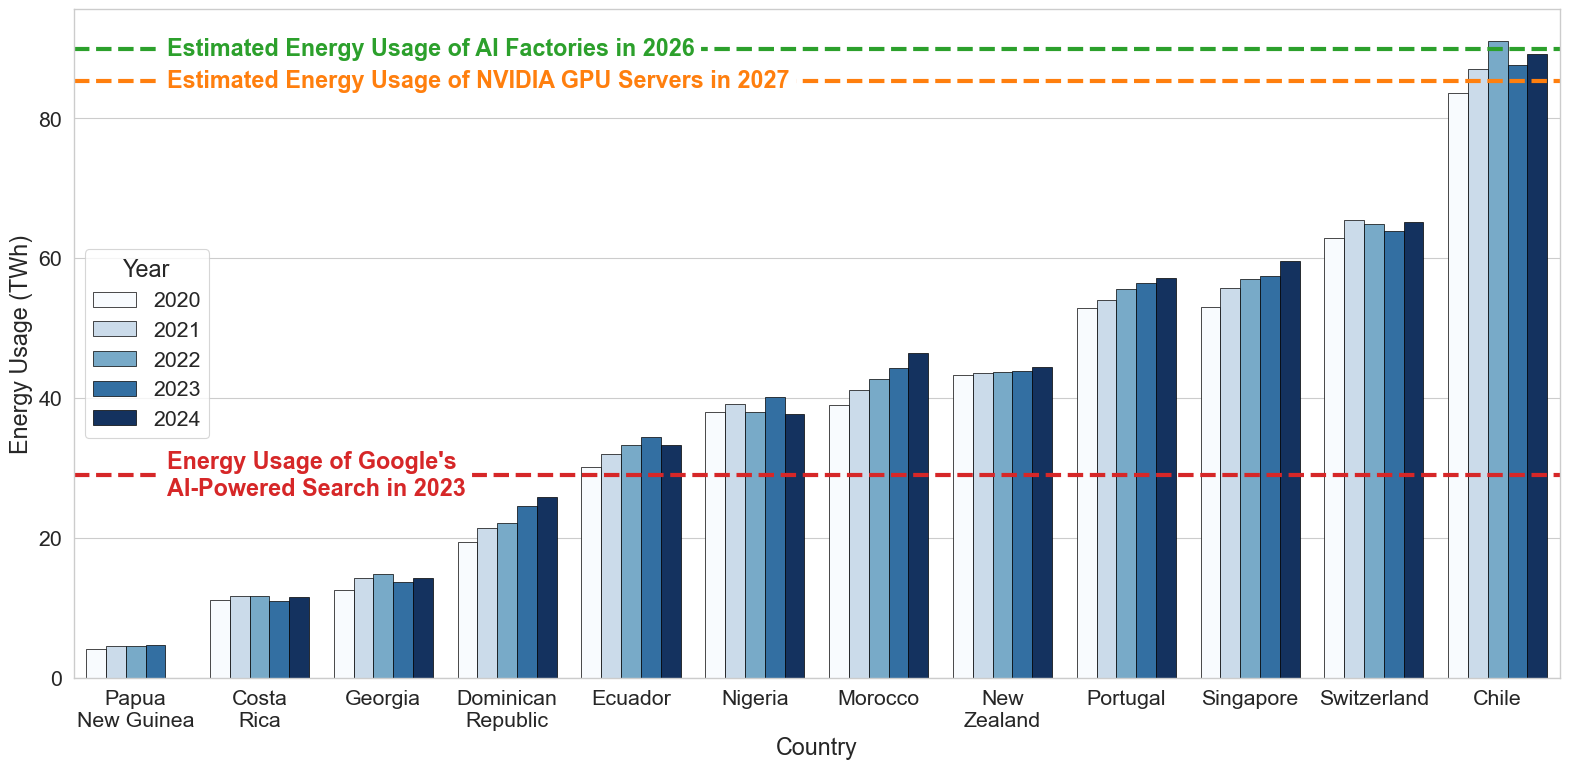

In [6]:
sns.set_theme(style="whitegrid")
sns.set_context("paper", font_scale=1.75)

plt.figure(figsize=(16, 8))
sns.barplot(x="Country", y="Energy Usage (TWh)", hue="Year", data=df_small, palette="Blues", edgecolor='black', linewidth=0.5)
#plt.title("Energy Usage by Country (TWh)")
plt.xlabel("Country")
plt.ylabel("Energy Usage (TWh)")
plt.legend(title="Year", loc='center left')
# Add a horizontal line for AI factories and NVIDIA GPU servers
for index, row in df_ai_small.iterrows():
    pal = sns.color_palette("tab10", n_colors=len(df_ai_small)+1)
    plt.axhline(y=row["Energy Usage (TWh)"], linestyle='--', label=row["Category"] + f" ({row['Energy Usage (TWh)']} TWh)", linewidth=3, color=pal[index+1])
    plt.text(0.25, row["Energy Usage (TWh)"], f"{row['Category']}", backgroundcolor='white', va='center', fontweight='bold', color=pal[index+1])
plt.tight_layout()
plt.savefig("../plots/energy_consumption_by_country.pdf", format="pdf", dpi=300, bbox_inches='tight', pad_inches=0.1)